In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('neos.csv')

data['close_approach_date'] = pd.to_datetime(data['close_approach_date'])

In [31]:
def get_month_hazardous_neos(start_date, end_date):

    mask = (data['close_approach_date'] >= pd.to_datetime(start_date)) & (data['close_approach_date'] <= pd.to_datetime(end_date))
        
    neos = data.loc[mask]

    split_hazard_neos = neos.groupby('is_potentially_hazardous')

    hazardous_neos = split_hazard_neos.get_group(True)

    return hazardous_neos

def plot_hazardous_neos_for_month(start_date, end_date, month_name):
    plt.figure(figsize=(20,15))

    hazardous_neos = get_month_hazardous_neos(start_date, end_date)

    strings = hazardous_neos['close_approach_date'].dt.strftime('%Y-%m-%d')

    diameter_x_100 = hazardous_neos['estimated_max_diameter_kilometers'] * 1000

    plt.scatter(strings, hazardous_neos['estimated_max_diameter_kilometers'], 
    s = diameter_x_100, c = diameter_x_100, alpha = 0.5);
    
    plt.xticks(rotation = 90)

    plt.ylabel("miss_distance_kilometers", fontsize=20);
    plt.title("Hazardous Asteroids %s 2018" %(month_name), fontsize=30);
    plt.grid();

    plt.show()

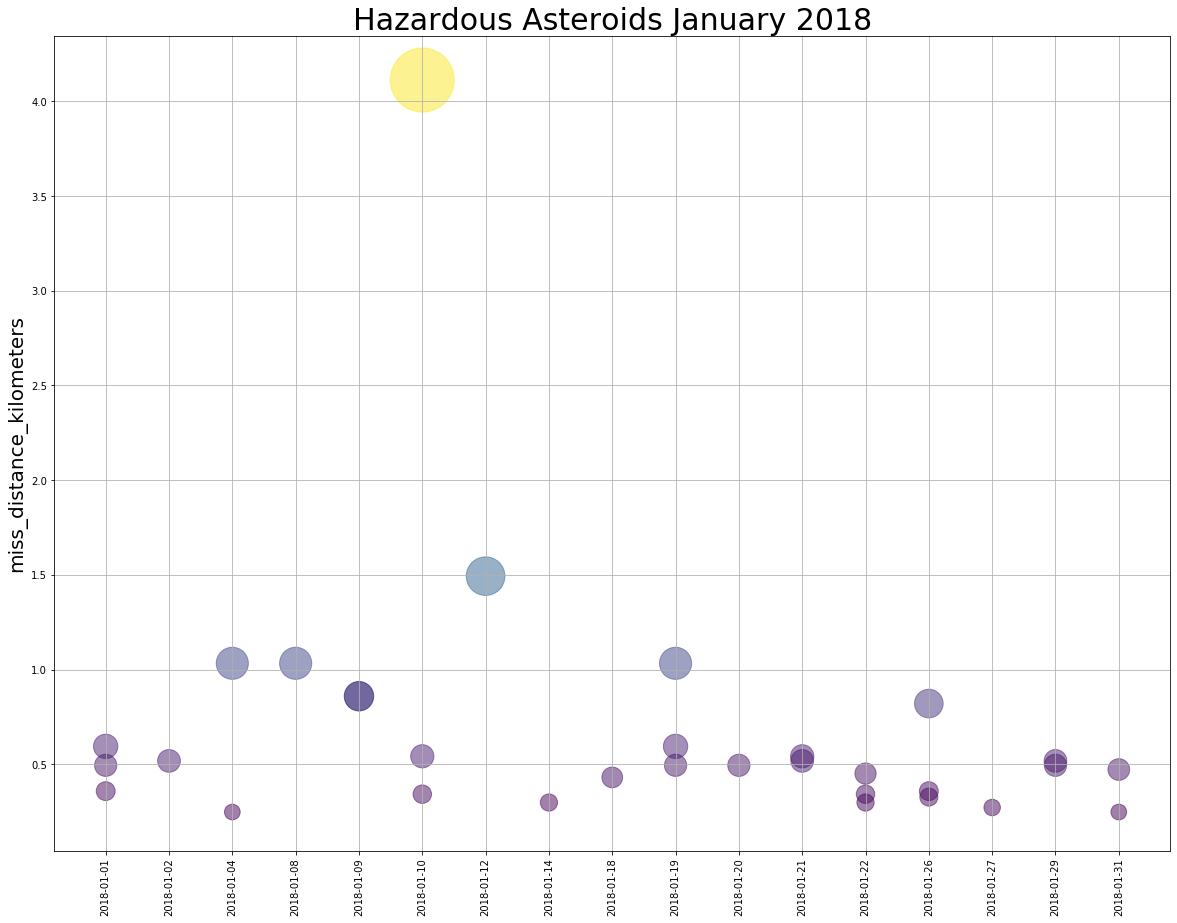

In [34]:
plot_hazardous_neos_for_month('2018-1-01', '2018-1-31', 'January')

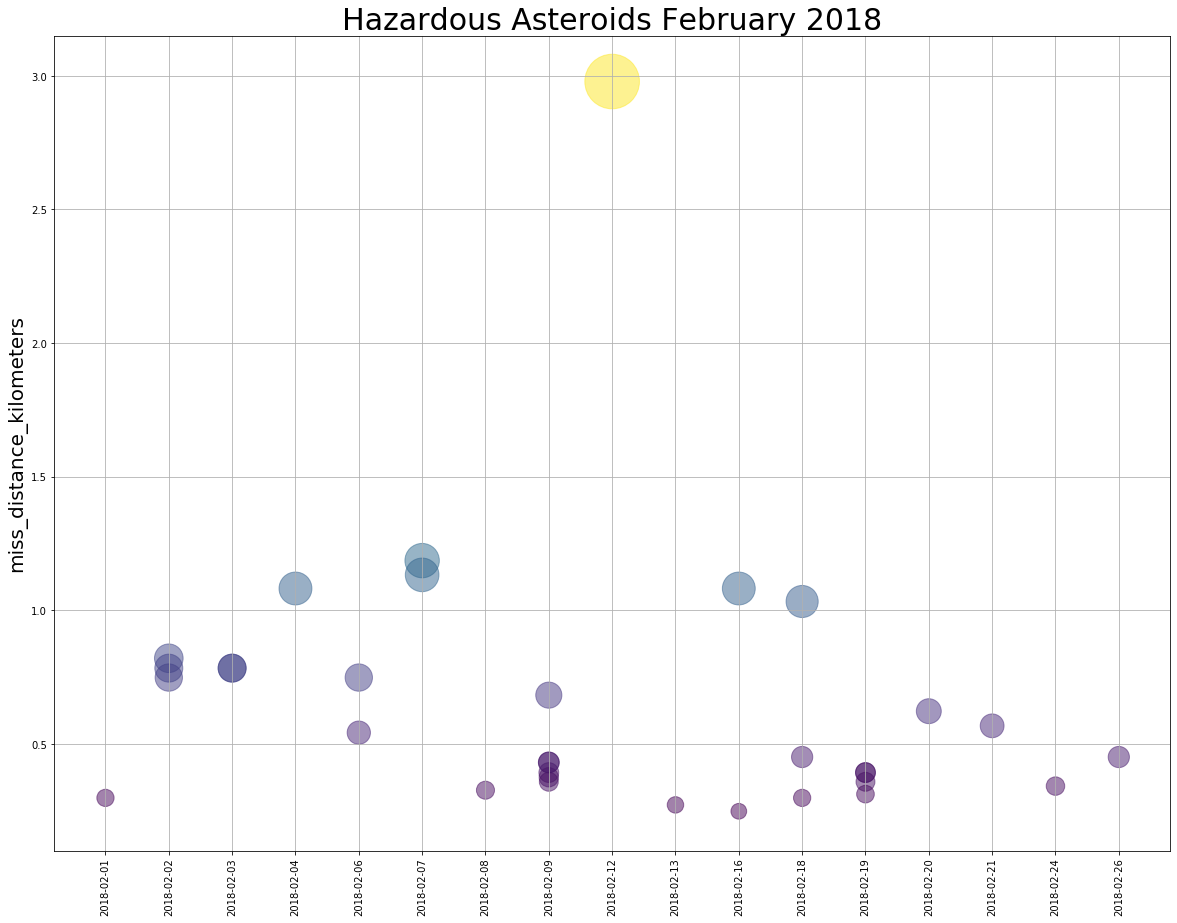

In [33]:
plot_hazardous_neos_for_month('2018-2-01', '2018-2-28', 'February')

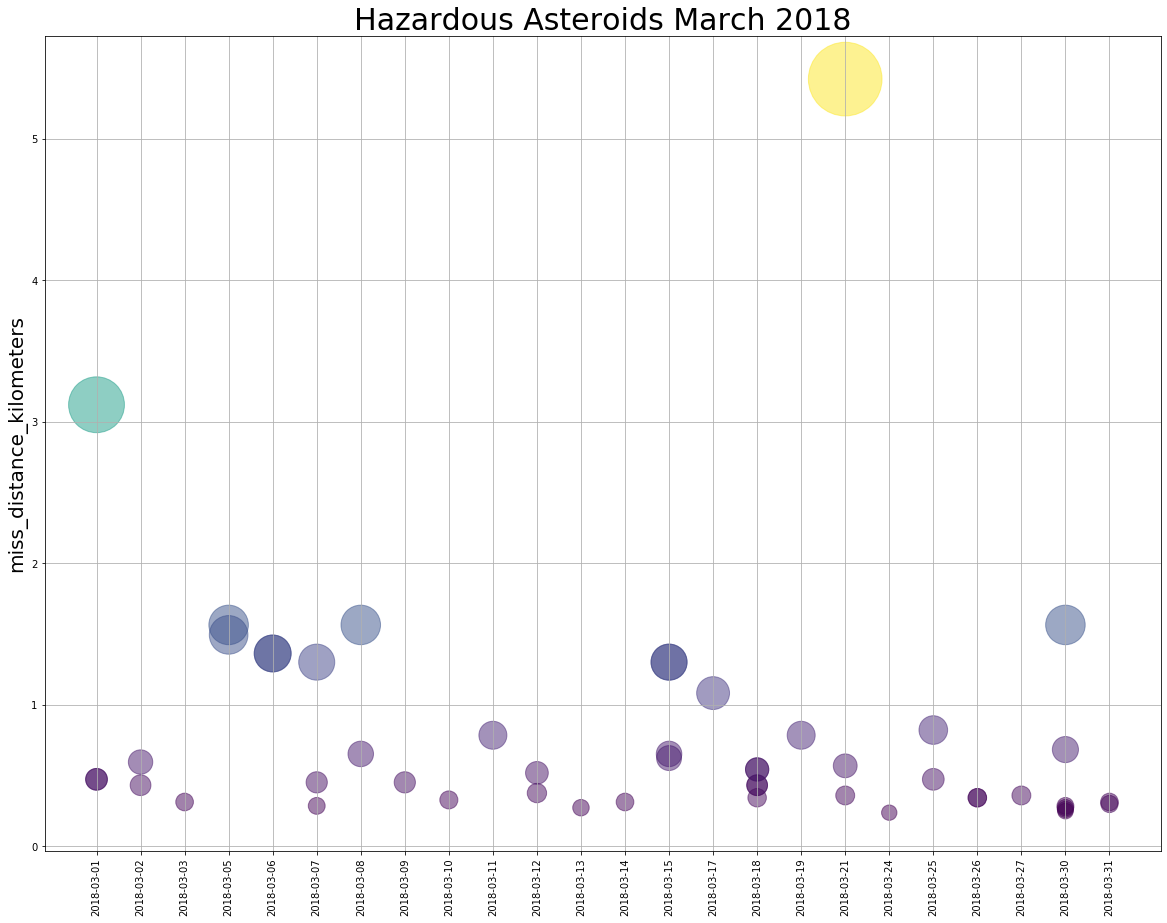

In [32]:
plot_hazardous_neos_for_month('2018-3-01', '2018-3-31', 'March')